### 성능평가

- 평가항목 방식 케이스
    - 지도학습의 분류
        - 혼동행렬(정확도, f1-score, 정밀도, 재현율), AUC, ROC
    - 지도학습의 회귀
        - 손실
    - 비지도학습
    - 강화학습

### 머신러닝>지도학습>분류>성능평가지표

- 통계학의 혼동행렬이라는 항목을 이용하여 평가
- 개요
    - 예측값이 실제 관측값을 얼마나 정확하게 예측하였는가?
    - 이 사항을 보여주는 행렬
    - 예
        - 암을 스스로 예측하였는데, 실제 양성인지 악성인지 예측하는 예
        - 실제는 병이 있었는데, 없다고 예측, 있다고 예측
        - 실제는 병이 없었는데, 있다고 예측, 없다고 예측
        

|구분|예측:True|예측:False|
|:--:|:--:|:--:|
|실제:예(Positive)|TP|EN|
|실제:아니오(Negative)|FP|TN|

- TP : 참긍정
    - 병이 있다고 예측, 실제로 병이 있음
    _ 긍정한 것이 참이 되었다
- TN : 참부정
    - 병이 없다고 예측, 실제로 병이 없음
    - 부정한 것이 참
- FP : 거짓긍정
    - 병이 있다고 예측, 하지만 병이 없음
    - 긍정한 것이 거짓
    - 1형 오류
_ FN : 거짓부정
    - 병이 없다고 예측, 하지만 병이 있음
    - 부정한 것이 거짓
    - 2형 오류

- 정밀도(P Precision)
    - 병이 있다고 예측을 했는데, 실제로 병이 있는 비율, 정답율
    - TP / (TP + FP)
- 재현율(R Recall)
    - 실제로 병이 있는 전체 데이터 중에 참긍정 비율
    - TP / (TP + FN)
- F1점수
    - 정밀도와 재현율의 조화평균(Harmonic mean)
    - F1=2 / (1/P + 1/R)
- 특이성
    - 실제 병이 없는 전체 사람들중에 예측이 TN의 비율
    - TN / (TN + FP)
- 곡선하 면적(ROC)
    - 참 긍정률과 거짓 부정률 사이의 관계 표현
    - 1-특이성
    - AUC : ROC의 상세값, 수치

#### 실제 데이터를 이용하여 성능평가를 수행

- 데이터 : 아이리스 활용

In [60]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [61]:
ds=load_iris()
ds.data.shape

(150, 4)

In [62]:
#데이터 확인
ds.data[:1], ds.feature_names, ds.target_names, ds.target[:1]

(array([[5.1, 3.5, 1.4, 0.2]]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0]))

In [63]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
ds.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
ds.target_names[ds.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [66]:
#아이리스 데이터 로드
def attach_iris():
    ds=load_iris()
    df=pd.DataFrame(ds.data, columns=ds.feature_names)
    #species라는 컬럼을 추가한다 -> 값은 setosa, versicolor, virginica 중 하나로 결정
    df['species']=ds.target
    df['species']=ds.target_names[ds.target]
    return df #DataFrame

df=attach_iris()

### 분류 알고리즘을 다양하게 사용하여 교차 성능평가 수행

- 하이퍼파라미터 튜닝 + 파이프 라인?
- 각각 알고리즘별로 적용하여 시각화 및 수치 비교?(사용)

In [67]:
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [68]:
#알고리즘
#향후 알고리즘에 대한 이해와 데이터에 대한 적합성 식견이 보완된다면 적절한 알고리즘 후보 추출가능
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [69]:
#알고리즘 시각화를 위해 사전 설정
#선형 그래프의 모양을 지정
#파라미터값은 임의 부여
class_map = {
    'LogisticRegression':('-', LogisticRegression()),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)),
    'GaussianNB':(':', GaussianNB()),
}

In [70]:
for key, value in class_map.items():
    print(key, value)

LogisticRegression ('-', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))
DecisionTreeClassifier ('--', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'))
RandomForestClassifier ('.-', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=1, max_leaf_nodes=None,
                       min_impurity_d

In [71]:
#데이터정리
X= df[df.columns[:4]]
X.shape

(150, 4)

In [72]:
#특정 종에 대해 정답을 구축
Y = df['species']== 'versicolor'
type(Y), Y[:2], len(Y)

(pandas.core.series.Series, 0    False
 1    False
 Name: species, dtype: bool, 150)

In [73]:
# 훈련용, 테스트용 데이터 분류
# 데이터가 작아서 결과물의 변별력을 높이고자 임의로 80%로 테스트 데이터를 높였다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

In [74]:
X_train.shape, X_test.shape, Y_train.shape

((30, 4), (120, 4), (30,))

(120, 2) <class 'numpy.ndarray'> 0.453989965151386
LogisticRegression:0.5458921694480103
(120, 2) <class 'numpy.ndarray'> 0.0
DecisionTreeClassifier:0.5458921694480103
(120, 2) <class 'numpy.ndarray'> 0.0
RandomForestClassifier:0.5458921694480103
(120, 2) <class 'numpy.ndarray'> 1.5826390896900355e-08
GaussianNB:0.5458921694480103


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


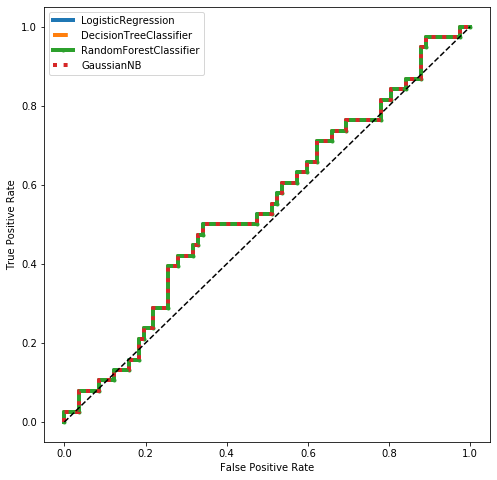

In [75]:
class_map = {
    'LogisticRegression':('-', LogisticRegression()),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)),
    'GaussianNB':(':', GaussianNB()),
}

#시각화를 통해 성능 확인(ROC, AUC)
plt.figure(figsize=(8,8))

#반복하여 시각화 처리
for name, (lineStyle, model) in class_map.items():
    #학습
    model.fit(X_train, Y_train)
    #예측
    #predict_proba():예측에 대한 확률로 예측
    #0,1중에 1이 될 확률이 0.57%이다 -> 1을 더 많이 예측하는 모델
    preds = model.predict_proba(X_test)
    print(preds.shape, type(preds), preds[0,1])
    #preds->Series타입으로 설정:roc_curve() 함수 형식에 맞추기 위해 예측답추출
    pred = pd.Series(preds[:, 1])
    #ROC 값 획득
    #roc 리턴값
    #fpr : 거짓 양성비 : x축
    #tpr : 참 양성비 : y축
    #_:임계값, tpr가 fpr을 계산할때(내부에서) 사용한 결정함수의 임계값
    fpr, tpr, _ = roc_curve(Y_test,pred)
    #ROC 드로잉
    #AUC 표시
    auc_score=auc(fpr, tpr)
    print('%s:%s'%(name, auc_score))
    #선 그리기
    plt.plot(fpr, tpr, lineStyle, linewidth=4, label=name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    pass

#시각화 마무리
plt.legend() #범례표시
plt.plot([0,1],[0,1],'k--')#대각선
plt.show() #표시

In [83]:
from sklearn.svm import SVC

class_map = {
    'LogisticRegression':('-', LogisticRegression()),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)),
    'GaussianNB':(':', GaussianNB()),
    'SVC':('-', SVC(probability=True)),
}

class_map

{'LogisticRegression': ('-',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 'DecisionTreeClassifier': ('--',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 'RandomForestClassifier': ('.-',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=5, max_features=1, max_leaf_nodes=Non

LogisticRegression:0.6912708600770219
DecisionTreeClassifier:0.9107830551989732
RandomForestClassifier:0.9959884467265725
GaussianNB:0.9801026957637997
SVC:0.9990372272143774


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


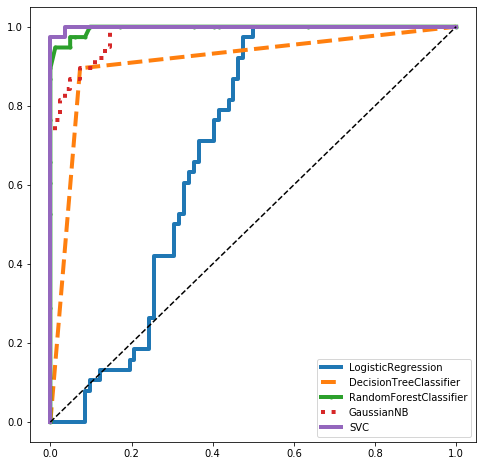

In [84]:
plt.figure(figsize=(8,8))

for name, (lineStyle, model) in class_map.items():
    model.fit(X_train, Y_train)
    preds = model.predict_proba(X_test)
    pred = pd.Series(preds[:, 1])
    fpr, tpr, _ = roc_curve(Y_test,pred)
    auc_score=auc(fpr, tpr)
    print('%s:%s'%(name, auc_score))
    plt.plot(fpr, tpr, lineStyle, linewidth=4, label=name)
    pass

#시각화 마무리
plt.legend() #범례표시
plt.plot([0,1],[0,1],'k--')#대각선
plt.show() #표시